In [1]:
#Choose CMIP Models bsed on ENSO diversity

In [2]:
#import my functions
import helpers.fileHandler as fh
import utils._modelDefinitions as _model
import utils._indexDefinitions as _index

In [3]:
import xarray
import numpy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

from eofs.xarray import Eof

In [4]:
import warnings
warnings.filterwarnings('ignore')

For all models, calculate the alpha, and plot eof 1 and 2. The alpha is based on monthly eof1/2 for Dec-Jan-Feb only

I am not really sure what we expect eof 1 and 2 should look like. Its different to E/C events

In [6]:
#modelSet=_model.scenarioMip[[4,6,7,29,30,31,32,33,34,36,37],:]

In [7]:
modelSet=_model.scenarioMip

In [8]:
modelSet

array([['CSIRO-ARCCSS', 'ACCESS-CM2', 'r1i1p1f1', 'r1i1p1f1'],
       ['CSIRO', 'ACCESS-ESM1-5', 'r1i1p1f1', 'r1i1p1f1'],
       ['AWI', 'AWI-CM-1-1-MR', 'r1i1p1f1', 'r1i1p1f1'],
       ['BCC', 'BCC-CSM2-MR', 'r1i1p1f1', 'r1i1p1f1'],
       ['CAMS', 'CAMS-CSM1-0', 'r1i1p1f1', 'r1i1p1f1'],
       ['CAS', 'CAS-ESM2-0', 'r1i1p1f1', 'r1i1p1f1'],
       ['NCAR', 'CESM2', 'r1i1p1f1', 'r10i1p1f1'],
       ['NCAR', 'CESM2-WACCM', 'r1i1p1f1', 'r1i1p1f1'],
       ['THU', 'CIESM', 'r1i1p1f1', 'r1i1p1f1'],
       ['CMCC', 'CMCC-CM2-SR5', 'r1i1p1f1', 'r1i1p1f1'],
       ['CMCC', 'CMCC-ESM2', 'r1i1p1f1', 'r1i1p1f1'],
       ['CNRM-CERFACS', 'CNRM-CM6-1', 'r1i1p1f2', 'r1i1p1f2'],
       ['CNRM-CERFACS', 'CNRM-ESM2-1', 'r1i1p1f2', 'r1i1p1f2'],
       ['CCCma', 'CanESM5', 'r1i1p1f1', 'r1i1p1f1'],
       ['CCCma', 'CanESM5-CanOE', 'r1i1p2f1', 'r1i1p2f1'],
       ['EC-Earth-Consortium', 'EC-Earth3', 'r1i1p1f1', 'r1i1p1f1'],
       ['EC-Earth-Consortium', 'EC-Earth3-CC', 'r1i1p1f1', 'r1i1p1f1'],
       ['

ACCESS-CM2
ACCESS-CM2
-0.1468771787638482


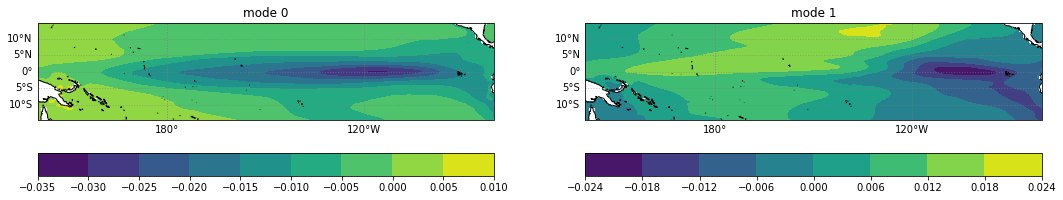

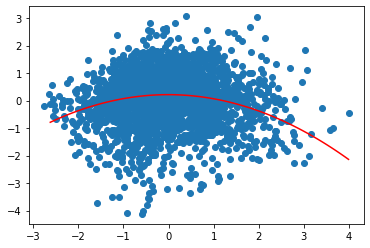

ACCESS-ESM1-5
ACCESS-ESM1-5
-0.1354072866028132


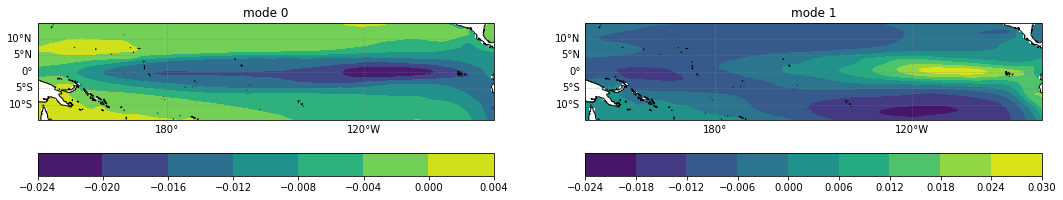

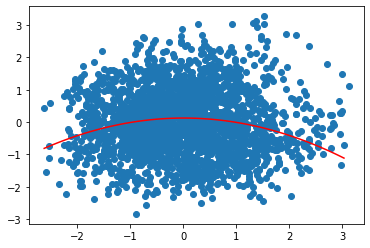

AWI-CM-1-1-MR
AWI-CM-1-1-MR
-0.2564307195863501
Input z must be 2D, not 1D
BCC-CSM2-MR
BCC-CSM2-MR
CMIP6.CMIP.BCC.BCC-CSM2-MR.historical.r1i1p1f1.Omon.tos.gn.v20181126|cmip.bcc.cma.cn downloading
CMIP6.CMIP.BCC.BCC-CSM2-MR.historical.r1i1p1f1.Omon.tos.gn.v20181126|aims3.llnl.gov downloading
CMIP6.CMIP.BCC.BCC-CSM2-MR.historical.r1i1p1f1.Omon.tos.gn.v20181126|esgf-data3.diasjp.net downloading
CMIP6.CMIP.BCC.BCC-CSM2-MR.historical.r1i1p1f1.Omon.tos.gn.v20181126|esgf3.dkrz.de downloading
CMIP6.CMIP.BCC.BCC-CSM2-MR.historical.r1i1p1f1.Omon.tos.gn.v20181126|esgf.nci.org.au downloading
CMIP6.CMIP.BCC.BCC-CSM2-MR.historical.r1i1p1f1.Omon.tos.gn.v20181126|esgf-data3.ceda.ac.uk downloading
the new name 'lat' conflicts
CAMS-CSM1-0
CAMS-CSM1-0
-0.27202578230368096


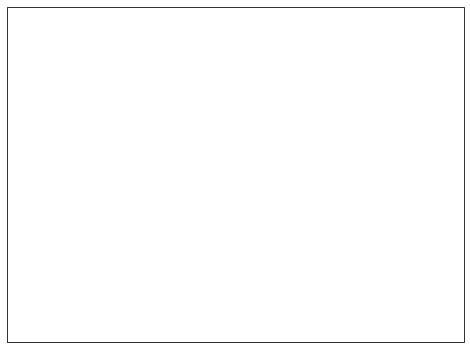

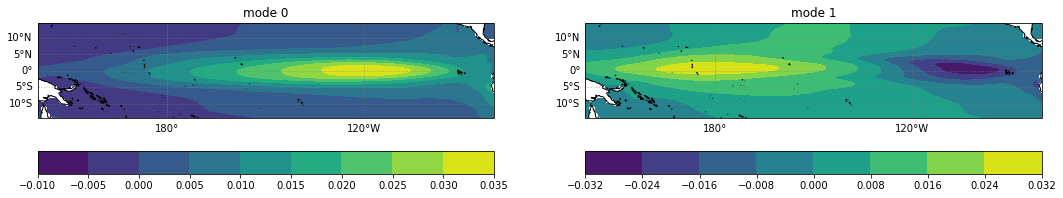

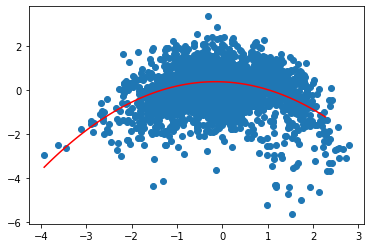

CAS-ESM2-0
CAS-ESM2-0
CMIP6.CMIP.CAS.CAS-ESM2-0.historical.r1i1p1f1.Omon.tos.gn.v20201228|esg.lasg.ac.cn downloading
CMIP6.CMIP.CAS.CAS-ESM2-0.historical.r1i1p1f1.Omon.tos.gn.v20200306|esgf-data3.ceda.ac.uk downloading
CMIP6.ScenarioMIP.CAS.CAS-ESM2-0.ssp585.r1i1p1f1.Omon.tos.gn.v20201230|esg.lasg.ac.cn downloading


In [ ]:
%run utils/ecIndex.ipynb

eofList = list()

for iModel in modelSet:
    try:
        print(iModel[1])
        eofSolver=solver(iModel)

        indeces, pFit, eofsXr = ecIndex(eofSolver)
        indeces['model']=iModel[1]

        print(indeces.alpha.values)
        
        eofList.append(indeces)

        fig=plt.figure(figsize=(18,12))

        for mode in [0,1]:
            ax=fig.add_subplot(1,2,mode+1,
                           projection=ccrs.Miller(central_longitude=210))

            ensoPlotter(eofsXr.sel(mode=mode), ax)

            plt.title("mode " + str(mode))

        plt.show()

        fig = plt.figure()

        plt.scatter(indeces.pc1, indeces.pc2)

        plt.plot(*pFit.linspace(), 'r')
        
        plt.show()
        
    except Exception as e:
        print(e)

In [ ]:
pFit

In [ ]:
pFit.convert().coef

Models can be chosen on some criteria

alpha < -0.15 looks appropriate from Cai et al 2018, however as the methodology doesn't match exactly, this is probably not right and should be calculated from observations.